# Лабораторная работа №1  
## Липатова София
## А-14-21  
# Вариант №27

**Задача 5.1.** 
Функция y=f(x) задана таблицей значений в точках . Используя метод наименьших квадратов 
(МНК), найти многочлен $P_m(x) = a_0 + a_1x + ... + a_mx^{m}$ наилучшего среднеквадратичного приближения оптимальной степени $m=m*$. За 
оптимальное значение $m*$ принять ту степень многочлена, начиная с которой величина $σ_m = \sqrt{\frac {1} {n+1} \sum_{k=0}^n ({P_m(x)_k-y_k})^2}$  стабилизируется 
или начинает возрастать. 

|$x_i$|   -0.4| -0.05| 0.3| 0.65| 1.0| 1.35| 1.7| 2.05| 2.4|
|-----|------|------|-----|-----|-----|-----|-----|------|------|
|$y_i$|0.918| 1.258| 0.685| -1.314| -1.709| -3.446| -2.473| 0.084| 6.031|

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([-0.4, -0.05, 0.3, 0.65, 1.0, 1.35, 1.7, 2.05, 2.4]) #setting the given vectors
y = np.array([0.918, 1.258, 0.685, -1.314, -1.709, -3.446, -2.473, 0.084, 6.031])
n = x.size #length of the vectors

print("Length of the vectors: ", n) #printing the size to the screen 


Length of the vectors:  9


In [15]:


def sys(m, x, y):
    
    s1 = np.zeros(2*m)
    b = np.zeros(m)
    
    for k in range(2*m):
        for i in range(n):
            s1[k]+=x[i]**k
            
    #print('\n', s1)
    
    for k in range(m):
        for i in range(n):
            b[k]+=y[i]*x[i]**k
            
    s = np.zeros((m,m))
    
    #print('\n', s1)
    
    for i in range(m):
        for j in range(m):
            s[i][j] = s1[i:i+m][j]
            
    #print('\n', s)
    
    sol = np.linalg.solve(s,b) 
    
    return sol


In [16]:
def P (a,x): #а - vector of the computed coefficients
    sum = 0
    for i in range(a.size):
        sum+= a[i]*(x**i)
    return sum

#creating a function computing root-mean-square deviation (RMSD)

def RMS(a, x, y): #а - вектор коэффициентов
    sum = 0
    for i in range(n):
        sum+=(P(a,x[i])-y[i])**2
    return np.sqrt( (1 / (n+1)) * sum)

"""
m=6
sol = sys(m,x,y)

print("\n Polynomial of degree 6 found by the built-in function:")
for i in range(m):
    print (" %f * x^(%d) + " % (sol[i],i))

print("\n Value of the RMS for the built-in function", RMS(sol, x, y))
"""

'\nm=6\nsol = sys(m,x,y)\n\nprint("\n Polynomial of degree 6 found by the built-in function:")\nfor i in range(m):\n    print (" %f * x^(%d) + " % (sol[i],i))\n\nprint("\n Value of the RMS for the built-in function", RMS(sol, x, y))\n'

In [17]:
m = np.array([i for i in range(15)])



m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 0.003778 * x^(0) + 
m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 -0.400127 * x^(0) + 
 0.403905 * x^(1) + 
m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 0.139831 * x^(0) + 
 -5.486545 * x^(1) + 
 2.945225 * x^(2) + 
m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 1.364688 * x^(0) + 
 -1.212605 * x^(1) + 
 -5.302971 * x^(2) + 
 2.749399 * x^(3) + 
m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 1.202845 * x^(0) + 
 -1.205241 * x^(1) + 
 -4.128434 * x^(2) + 
 1.571179 * x^(3) + 
 0.294555 * x^(4) + 
m =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] $/sigma =$  <function RMS at 0x000001F959876430>
 1.233434 * x^(0) + 
 -1.333580 * x^(1) + 
 -4.359184 * x^(2) + 
 2.27705

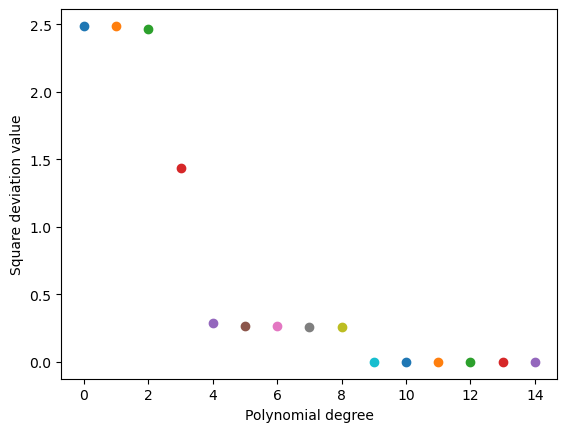

In [18]:
for i in m:
    sol = sys(i,x,y)
    for k in range(i):
        print (" %f * x^(%d) + " % (sol[k],k))
    print("m = ", m, "$/sigma =$ ", RMS)
    plt.scatter(i, RMS(sol,x,y))
    
plt.xlabel('Polynomial degree')
plt.ylabel('Square deviation value')
plt.show()


#Тестировать для каждого m и печатать каждую сигма и уже потом отобразить подходящее решение.
#m не равно 8, m = 4 по-моему

**Вывод.** 
Оптимальное значение m = 4.

**2. Постановка задачи.**
Зависимость между величинами x и  y описывается функцией   y=f(x, a, b), где a и  b – неизвестные параметры.  Найти  эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. 

$a + b(x+2)^3$


 Polynomial of degree 1 found by the built-in function:
 -2.310024 * t^(0) + 
 0.520002 * t^(1) + 
[ -6.47004371  -3.20858834  -2.34330426  -2.27674395  -1.41145987
   1.8499955    9.1050697   21.95121025  41.98586468  70.80648053
 110.01050531]


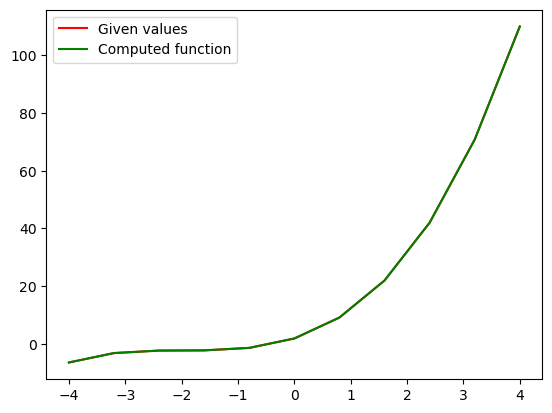

In [19]:
x = np.array([-4, -3.2, -2.4, -1.6, -0.8, 0, 0.8, 1.6, 2.4, 3.2, 4])
y = np.array([-6.47, -3.2086, -2.3433, -2.2767, -1.4114, 1.85, 9.105, 21.951, 41.986, 70.806, 110.01])

t = np.array([(i+2)**3 for i in x])


m=2

sol = sys(m,t,y)


print("\n Polynomial of degree 1 found by the built-in function:")
for i in range(m):
    print (" %f * t^(%d) + " % (sol[i],i))
    
def func(x):
    return sol[0] + sol[1]*(x+2)**3


print(func(x))
    
plt.plot(x,y, color = 'red', label = 'Given values')
plt.plot(x, func(x), color = 'green', label = 'Computed function')
plt.legend()
plt.show()


#напечатать график найденной функции, сравнить с исходной таблицей (сделать обратную замену)

**3. Постановка задачи.**
Функция  y=f(x) задана на отрезке $[a,b]$.Выполняется приближение функции интерполяционными многочленами по различным системам узлов. 

Определить  количество узлов в каждом случае, требуемых для достижения точности ε = 0.001.

$$f(x) = 3*sin(x^3),$$ $$[0, 4]$$

Выполним приближение функции с помощью многочлена Лагранжа:

$$L_{i,j}(x)=\sum_{i=0}^{n}y_i \prod_{j=0,j\neq i}^{n} \frac{x-x_j}{x_i-x_j}$$

**1) $P_n^{(I)}$ – многочлен, построенный на равномерной сетке;**

In [45]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    return 3*np.sin(x**3)

eps = 0.001

#Многочлен Лагранжа

def Lagrange_polynom(arg, x, y):
    result = 0
    for i in range(len(x)):
        multiply = 1
        for j in range(len(x)):
            if i != j:
                multiply *= (arg-x[j])*1.0/(x[i]-x[j])
        result += y[i]*multiply
    return result

In [46]:
def uniform_setka_x(k):
    return ([4/(k-1)*i for i in range(k)])
    
def uniform_setka_y(k):
    return ([f(4/(k-1)*i) for i in range(k)])

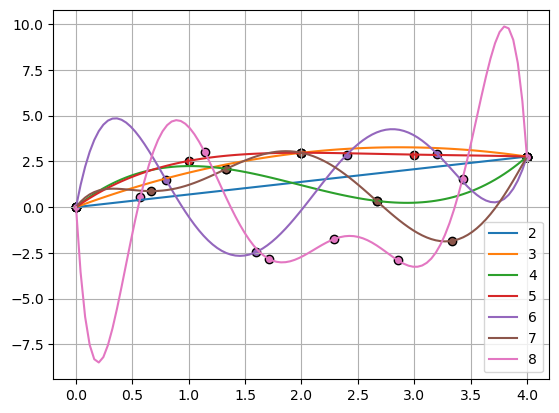

In [47]:
arg = np.linspace(0, 4, 100)
for k in range(2, 9):
    plt.plot(arg, Lagrange_polynom(arg, uniform_setka_x(k), uniform_setka_y(k)), label=k)
    plt.scatter(uniform_setka_x(k), uniform_setka_y(k), edgecolors='k')
plt.grid()
plt.legend()
plt.show()

In [48]:
arg = np.linspace(0, 4, 100)
k = 2
x = np.abs(f(arg) - Lagrange_polynom(arg,uniform_setka_x(k),uniform_setka_y(k)))
epsilon = 0.001
while(True):
    flag = True
    for i in range (0, 100):
        if(x[i] > epsilon):
            flag = False
    if(flag):
        break
    k += 1
    x = np.abs(f(arg) - Lagrange_polynom(arg,uniform_setka_x(k),uniform_setka_y(k)))
print(k)

100


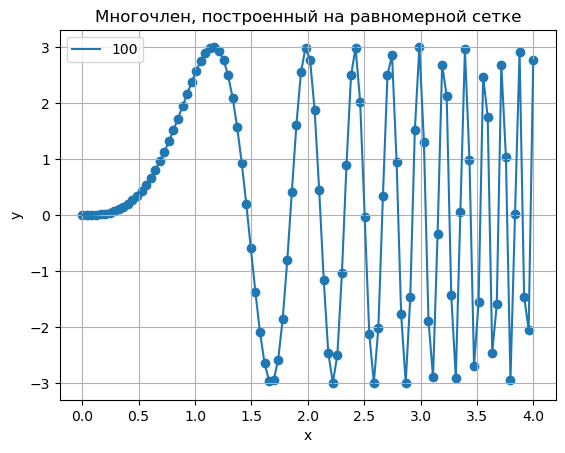

In [49]:
plt.plot(arg, Lagrange_polynom(arg,uniform_setka_x(k),uniform_setka_y(k)), label=k)
plt.scatter(uniform_setka_x(k),uniform_setka_y(k))
plt.title("Многочлен, построенный на равномерной сетке")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

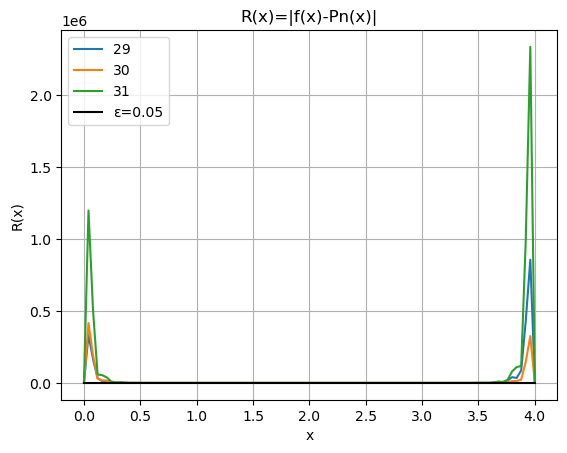

In [50]:
for k in range(29, 32):
    R = np.abs(f(arg) - Lagrange_polynom(arg,uniform_setka_x(k),uniform_setka_y(k)))
    plt.plot(arg, R, label=k)
plt.plot(arg, epsilon+0*arg, color='black',label="ε=0.05")
plt.title("R(x)=|f(x)-Pn(x)|")
plt.xlabel('x')
plt.ylabel('R(x)')
plt.grid()
plt.legend()
plt.show()

По графику видно, что для достижения точности ε = 0.001 понадобилось 30 узлов

**2) $P_n^{(II)}$ – многочлен, построенный на сетке, заданной при помощи датчика случайных чисел;**

In [51]:
def random_setka_x(k):
    res = [0]
    res.extend(np.random.uniform(0, 4, k-2))
    res.append(4)
    return res

def random_setka_y(x):
    return ([f(x[i]) for i in range(0, len(x))])

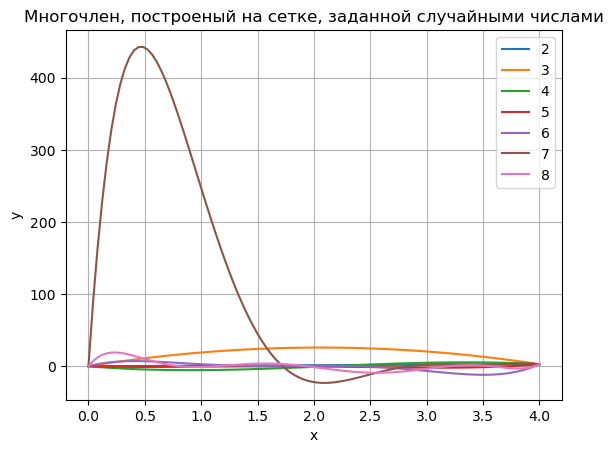

In [52]:
arg = np.linspace(0, 4, 100)
for k in range(2, 9):
    plt.plot(arg, Lagrange_polynom(arg, random_setka_x(k), random_setka_y(random_setka_x(k))), label=k)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Многочлен, построеный на сетке, заданной случайными числами")
plt.legend()
plt.grid()
plt.show()

In [53]:
def count_nodes(x_k, y_k):
    arg = np.linspace(0, 4, 100)
    x = np.abs(f(arg) - Lagrange_polynom(arg, x_k, y_k))
    epsilon = 0.001
    while(True):
        flag = True
        for i in range(100):
             if(x[i] > epsilon):
                    flag = False
                    break
        break
    if (flag):
        return True
    else:
        return False

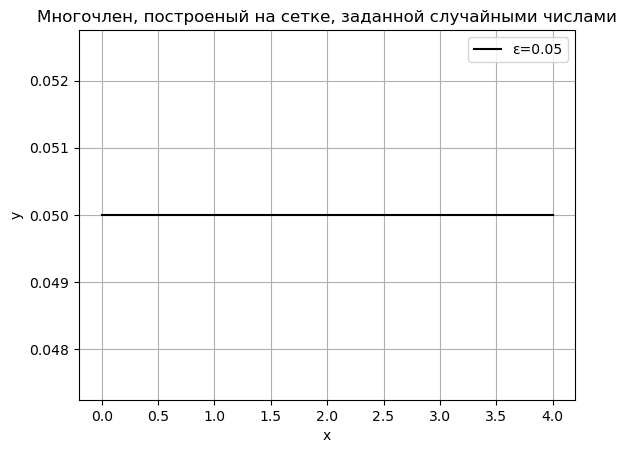

In [54]:
arg = np.linspace(0, 4, 100)
for k in range(25, 100):
    x_k = random_setka_x(k)
    y_k = random_setka_y(x_k)
    if (count_nodes(x_k, y_k)):
        R = np.abs(f(arg) - Lagrange_polynom(arg, x_k, y_k))
        plt.plot(arg, R, label=k)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Многочлен, построеный на сетке, заданной случайными числами")
plt.plot(arg, 0.001+arg*0,color="black",label="ε=0.05")
plt.grid()
plt.legend()
plt.show()

При каждом запуске меняется кол-во узлов, требуемых для достижения заданной точности, поэтому нельзя точно определить кол-во узлов, в последнем запуске потребовалось от 30 до 57 узлов, в среднем 44 узла.

**3) $P_n^{(III)}$ – многочлен, построенный на сетке, определяемой при помощи корней Чебышева.**

In [55]:
def Chebyschev_partition(a, b, n):
    n -= 1
    get_x = lambda k: 0.5*(a + b) + 0.5*(b - a) * np.cos(np.pi * (2*k + 1)/(2*n + 2))
    x = [get_x(k) for k in range(n, -1, -1)]
    partition = np.array(x)
    return partition

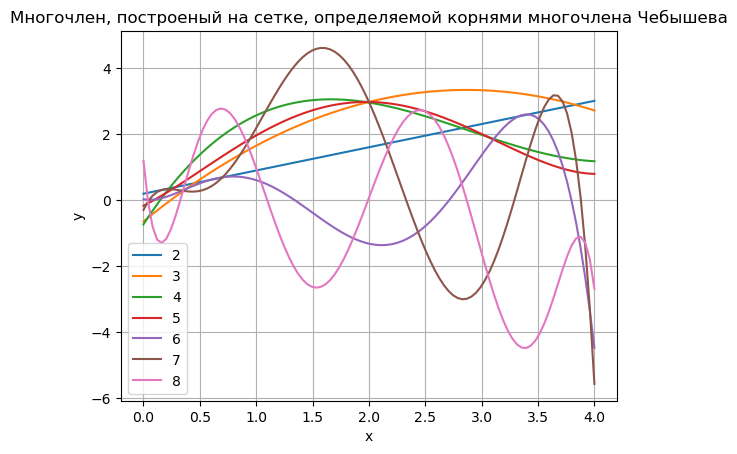

In [56]:
arg = np.linspace(0, 4, 100)
for k in range(2, 9):
    x_k = Chebyschev_partition(0, 4, k)
    y_k = np.array([f(i) for i in x_k])
    plt.plot(arg, Lagrange_polynom(arg, x_k, y_k), label=k)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Многочлен, построеный на сетке, определяемой корнями многочлена Чебышева")
plt.legend()
plt.grid()
plt.show()

In [57]:
arg = np.linspace(0, 4,100)
k = 2
while(True):
    x_k = Chebyschev_partition(0, 4, k)
    y_k = np.array([f(i) for i in x_k])
    x = np.abs(f(arg) - Lagrange_polynom(arg, x_k, y_k))
    fl = True
    for i in range (0, 100):
        if(x[i] > epsilon):
            fl = False
    if(fl):
        break
    k += 1
print(k)

68


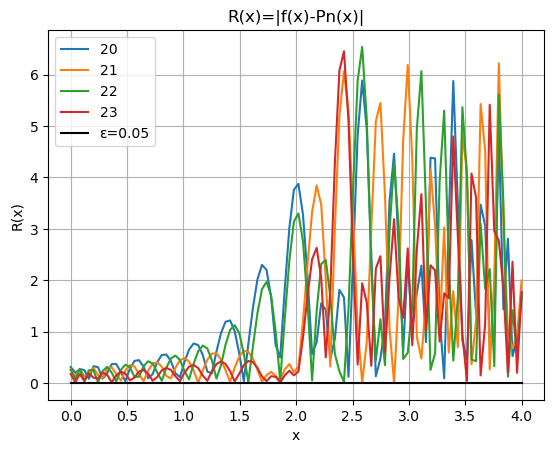

In [58]:
for k in range(20, 24):
    x_k = Chebyschev_partition(0, 4, k)
    y_k = np.array([f(i) for i in x_k])
    plt.plot(arg, np.abs(f(arg) - Lagrange_polynom(arg,x_k,y_k)), label=k)
plt.plot(arg, epsilon + 0*arg, color="black",label="ε=0.05")
plt.xlabel('x')
plt.ylabel('R(x)')
plt.title("R(x)=|f(x)-Pn(x)|")
plt.legend()
plt.grid()
plt.show()

Из графика видно, что для достижения точности 0.05 потребовалось 22 узла.

In [59]:
from scipy.interpolate import CubicSpline

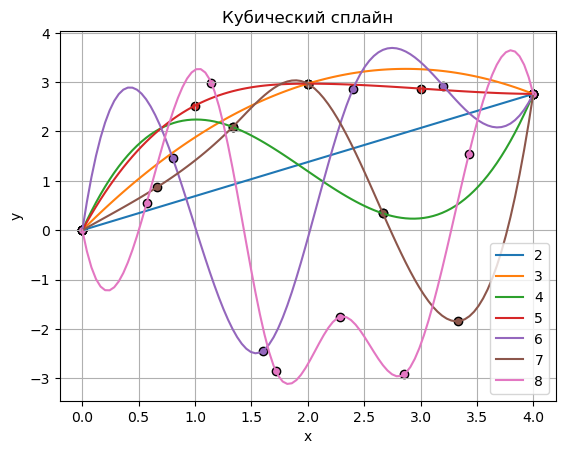

In [60]:
arg = np.linspace(0, 4, 100)
for k in range(2, 9):
    x_k = uniform_setka_x(k)
    y_k = uniform_setka_y(k)
    Spline = CubicSpline(x_k, y_k)
    plt.plot(arg, Spline(arg), label=k)
    plt.scatter(x_k, y_k, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Кубический сплайн")
plt.legend()
plt.grid()
plt.show()

In [61]:
arg = np.linspace(0, 4, 100)
k = 2
while(True):
    x_k = uniform_setka_x(k)
    y_k = uniform_setka_y(k)
    Spline = CubicSpline(x_k, y_k)
    x = np.abs(f(arg)-Spline(arg))
    flag = True
    for i in range (0, 100):
        if(x[i] > epsilon):
            flag = False
    if(flag):
        break
    k += 1
print(k)

100


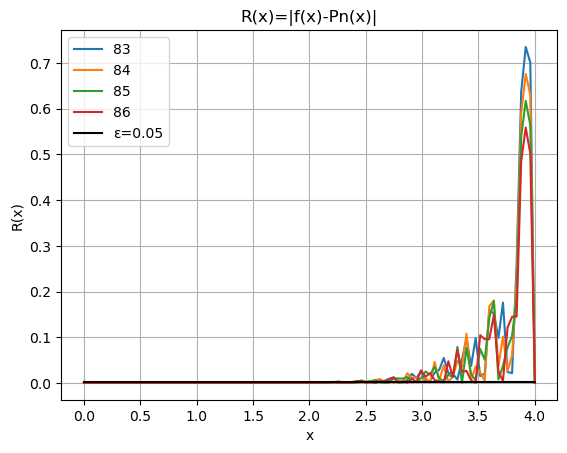

In [62]:
arg = np.linspace(0, 4, 100)
for k in range(83, 87):
    x_k = uniform_setka_x(k)
    y_k = uniform_setka_y(k)
    Spline = CubicSpline(x_k, y_k)
    plt.plot(arg, np.abs(f(arg)-Spline(arg)), label=k)
plt.plot(arg, epsilon+0*arg,label="ε=0.05", color='black')
plt.xlabel('x')
plt.ylabel('R(x)')
plt.title("R(x)=|f(x)-Pn(x)|")
plt.legend()
plt.grid()
plt.show()

Из графика видно, что потребовалось 85 узлов для достижения точности 0.05

***Общий вывод для задачи 5.3:***

1) для достижения точности  𝜀=0.001 с помощью многочлена, построенного на равномерной сетке понадобилось **30** узлов.

2) для достижения точности  𝜀=0.001 с помощью многочлена, построеного на сетке, заданной случайными числами понадобилось **44** узлов (средний результат).

3) для достижения точности  𝜀=0.001 с помощью многочлена, построеного на сетке, определяемой корнями многочлена Чебушева понадобилось **22** узлов.

4) для достижения точности  𝜀=0.001 с помощью кубического сплайна понадобилось **85** узлов.